In [7]:
import numpy as np
import preprocessing as pre
import testing
from decision_tree import DecisionTree
import pickle
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

### Load and preprocess the data

In [8]:
X, y = pre.load_data('../data/fashion_train.npy')
pca = pickle.load(open('./models/pca_65.pkl', 'rb'))
X_processed = pre.preprocess(X,pca)

c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.5.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Hyperparameter Optimization

In [10]:
# Use Grid Search with 5 fold cross validation
# For each combination of hyperparameters it splits the data into 5 sets and trains 5 times,
# each time using 1 set as validation data and the remaining 4 sets as train data.
# Selects the combination of hyperparameters that maximize accuarcy.
max_depth = [3, 5, 7, 9, 11]
min_samples_split = [2, 3, 4, 5]

param_grid = dict(max_depth=max_depth, min_samples_split=min_samples_split)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X_processed, y)

print(
    "The best parameters are %s with a score of %0.4f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'max_depth': 9, 'min_samples_split': 4} with a score of 0.7850


### Create model from our implementation with the best parameters

In [6]:
dt = DecisionTree(max_depth=grid.best_params_["max_depth"], min_samples_split=grid.best_params_["min_samples_split"])
dt.fit(X_processed, y) # fit the train data

In [7]:
# save the model
with open('./models/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt, f) 

### Creating reference implementation model

In [9]:
dt_reference = DecisionTreeClassifier(max_depth=grid.best_params_["max_depth"],min_samples_split=grid.best_params_["min_samples_split"],criterion="gini") # initialize it with the found parameters
dt_reference.fit(X_processed, y) # fit the train data

DecisionTreeClassifier(max_depth=9, min_samples_split=3)

In [10]:
# save the model
with open('./models/decision_tree_reference_model.pkl', 'wb') as f:
    pickle.dump(dt_reference, f)

### Testing and model evaluation

In [3]:
# Do bootstrapping for estimating the population metrics
implemented_model_results = testing.bootstrapping_test(model_filepath="models/decision_tree_model.pkl")
reference_model_results = testing.bootstrapping_test(model_filepath="models/decision_tree_reference_model.pkl")

c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.5.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


accuracy: 77.62% ± 0.57%||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
recall: 77.62% ± 0.57%
precision: 77.64% ± 0.58%
f1: 77.58% ± 0.58%
confusion matrix:
 [[0.75114989 0.00499004 0.03508746 0.06012675 0.14864586]
 [0.01289044 0.93145848 0.00819964 0.04050567 0.00694577]
 [0.03202818 0.00997687 0.78372407 0.01911293 0.15515795]
 [0.05589143 0.01419289 0.03133717 0.84319014 0.05538837]
 [0.18689845 0.00097477 0.19591235 0.04499252 0.57122191]]


c:\Users\andra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.5.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


accuracy: 77.36% ± 0.57%||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
recall: 77.36% ± 0.57%
precision: 77.41% ± 0.57%
f1: 77.36% ± 0.57%
confusion matrix:
 [[0.74317582 0.004042   0.03383839 0.06276429 0.1561795 ]
 [0.01107328 0.92993861 0.00809525 0.0408206  0.01007226]
 [0.03098203 0.01091964 0.78119776 0.02096235 0.15593823]
 [0.05225075 0.01601716 0.03193835 0.83773372 0.06206002]
 [0.18177101 0.00196965 0.19124034 0.0488354  0.57618359]]


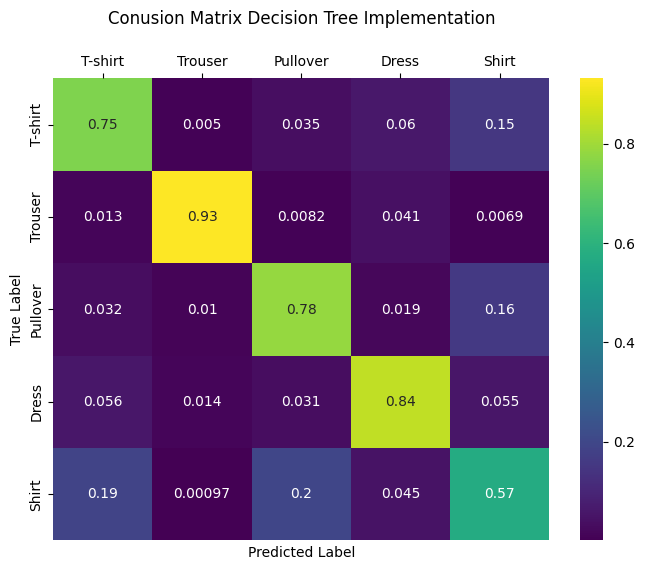

In [ ]:
# Plot the confusion matrices
testing.plot_confusion_matrix(implemented_model_results["cm"],title="Confusion Matrix Decision Tree Implementation")

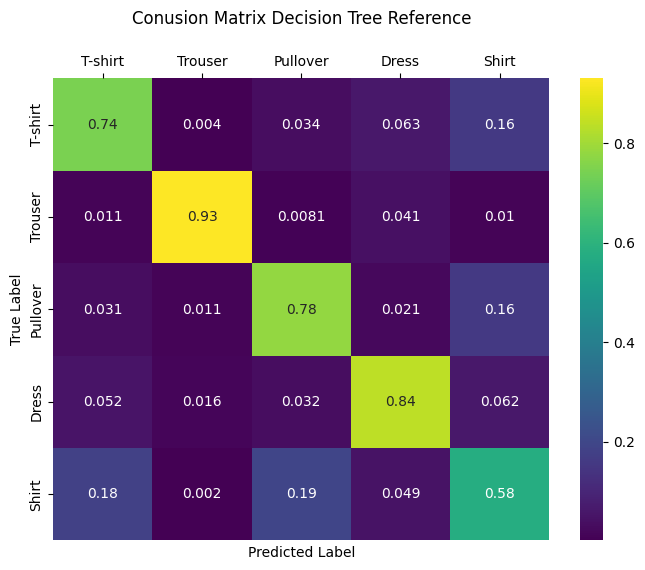

In [5]:
testing.plot_confusion_matrix(reference_model_results["cm"],title="Confusion Matrix Decision Tree Reference")